# Text Summarization in Python

## Motivation: 
The length of textual data is increasing and people have less time. Often the newspaper articles run into a long text of, say 1000 -1200 words. As wearable devices leap to prominence (Google Glass, Apple Watch, to name a few), content must adapt to the limited screen space available on these devices.
The task of generating intelligent and accurate summaries for long pieces of text has become a popular research as well as industry problem.

## Approach: 
Extractive text summarization is all about finding the more important sentences from a document as a summary of that document.
Our approach is using the TextRank algorithm to find these 'important' sentences.

## Implementation

### 1. Importing important libraries

In [1]:
# numpy library helps in working with arrays: array creation and manipulation
# this implementation uses array for storing the matrices generated as 2-D arrays
# PyPDF2 is a library used for reading the PDF files
# docx2txt is the library used for reading Word documents 
# sys library has been used for printing the size of data structures used in the program
import numpy as np
import PyPDF2
import docx2txt
import sys

In [2]:
# matplotlib is a library that is used to visualize the data by drawing graphs of matrix inputs
# we will use it for drawing the matrices generated later in the program 
# %matplotlib inline is a command used to show the graphs in the jupyter notebook

import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# networkx library helps in working with graphs ...
# and later performing the PageRank algorithm ...
# which is the crux of this implementation to find ...
# the importance of each sentence using their 'rank' as a metric ...
# rank, the output of the method textrank, is a measure of importance of sentences
# this library has been used in the cell no. ()

import networkx as nx

In [4]:
# the PunktSentenceTokenizer library is being imported from the file punkt.py contained in package nltk.tokenize 
# this is used to tokenize the document into sentences

# Tokenization: Tokenization is the process of demarcating and possibly classifying.. 
# sections of a string of input characters. 
# The resulting tokens are then passed on to some other form of processing. 

from nltk.tokenize.punkt import PunktSentenceTokenizer

In [5]:
# TfidfTransformer and CountVectorizer libraries are being imported

# CountVectorizer: In this implementation, a CountVectorizer object is being created that ..
# will be used for creating the document-term matrix

# tFidTransformer: In this implementation,TfidfTransformer is used for executing the method fit_transform()... 
# which provides the output as a document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences


from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

### 2.  Function to read the document from user
Supported formats: .txt, .pdf 

Input: Takes the name of the file as input. 

Output: Returns a string output containing the contents of the file.

In [6]:
# we are going to show an example of how the method is working
# first let's take the document as an input
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

### 3. Function to tokenize the document
Input: String of text document

Output: A list containing sentences as its elements

In [7]:
# the function used for tokenizing the sentences
# tokenization of a sentence: '''provided in cell() above'''

def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### 4. Read the document

In [8]:
# reading a file and 
# printing the size of the file
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: story1.txt
You have asked for the document story1.txt
1
<class 'str'>
The length of the file is: 7127


### 5. Generate a list of sentences in the document

In [9]:
# we want to tokenize the document for further processing
# tokenizing the sentence means that we are creating a list of all the sentences of the document.
# Need of tokenizing the document: Initially the document is in just a string format.
# if we want to process the document, we need to store it in a data structure.
# Tokenization of document into words is also possible, but we will go with the tokenizing with the sentences
# Since we want to choose the most relevant sentences, we need to generate tokens of sentences only
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 1016
The size of the item 0 in Bytes is: 147


In [10]:
# let us see the data type of sentences_list
# It will be list
print(type(sentences_list))

<class 'list'>


In [11]:
# let us analyse the elements of the sentences
# len() method applies on the list and provides the number of elements in the list
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 101


In [12]:
# print the elements of the list
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

 In Banaras District there is a village called Bira in which an old, childless
widow used to live.
She was a Gond woman named Bhungi and she didn't
own either a scrap of land or a house to live in.
Her only source of livelihood
was a parching oven.
The village folk customarily have one meal a day of
parched grains, so there was always a crowd around Bhungi's oven.
Whatever grain she was paid for parching she would grind or fry and eat it.
She slept in a corner of the same little shack that sheltered the oven.
As soon
as it was light she'd get up and go out to gather dry leaves from all around to
make her fire.
She would stack the leaves right next to the oven, and after
twelve, light the fire.
But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry.
She
was obliged to work without pay for Pandit Udaybhan Pandey She also had
to fetch water for his house.
And, for this reason, from time to time the oven
was not lit.
She liv

### 6. Generate term-document matrix (TD matrix) of the data 

In [13]:
# Convert a collection of text documents to a matrix of token counts
# fit_transform method of CountVectorizer() class 
# Learn the vocabulary dictionary and return term-document matrix. 
# I/p: An iterable which yields either str, unicode or file objects.
# O/p: The term-document matrix named cv_matrix
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

**So what does CountVectorizer.fit_transform() do?**

In [14]:
# a demo of what CountVectorizer().fit_transform(text) does
cv_demo = CountVectorizer() # a demo object of class CountVectorizer

# I have repeated the words to make a non-ambiguous array of the document text matrix 

text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))

# Result is 2-d matrix containing document text matrix
# Notice that in the second row, there is 2.
# also, bad is repeated twice in that sentence.
# so we can infer that 2 is corresponding to the word 'bad'
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am', 'are', 'ashish', 'bad', 'good', 'is', 'not', 'you']


In [15]:
# printing the cv_matrix type
# and how it is being stored in memory?
# it is stored in the compressed row format
# compressed row format: 
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <101x492 sparse matrix of type '<class 'numpy.int64'>'
	with 1223 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['able', 'accept', 'acted', 'afraid', 'after', 'again', 'against', 'alarmed', 'alas', 'all', 'already', 'also', 'always', 'am', 'amid', 'amidst', 'an', 'and', 'anger', 'another', 'any', 'anybody', 'are', 'around', 'arrived', 'as', 'ashes', 'asked', 'at', 'attendants', 'attention', 'authority', 'available', 'away', 'balls', 'banaras', 'band', 'barn', 'basket', 'baskets', 'be', 'because', 'bed', 'been', 'before', 'began', 'being', 'belly', 'bewildered', 'bhungi', 'bira', 'blaze', 'body', 'bold', 'breaking', 'breath', 'broke', 'build', 'building', 'built', 'but', 'by', 'called', 'came', 'can', 'carrying', 'cereal', 'childless', 'chores', 'clay', 'clustering', 'collapsed', 'collect', 'coming', 'command', 'completely', 'conflagrati

In [16]:
# Tnormalized: document-term matrix normalized (value 0-1) according to the TF-IDF
# TF(Term Frequency): the no. of times a term(a word here) appears in the current document(single sentence here)
# IDF(Inverse Document Frequency): the no. of times a term(a word here) appears in the entire corpus
# Corpus: set of all sentences

normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.24450772 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [17]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <492x101 sparse matrix of type '<class 'numpy.float64'>'
	with 1223 stored elements in Compressed Sparse Column format>>


/home/ashish/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ashish/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/ashish/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/ashish/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements w

Number of edges 3319
Number of vertices 101


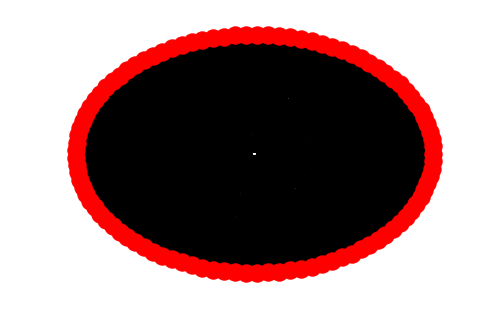

The memory used by the graph in Bytes is: 56


In [18]:
# drawing a graph to proceed for the textrank algorithm
# nx_graph is a graph developed using the networkx library
# each node represents a sentence
# an edge represents that they have words in common
# the edge weight is the number of words that are common in both of the sentences(nodes)
# nx.draw() method is used to draw the graph created

nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [29]:
#  note that the graph above is dense and therefor it resembles a circle
# if a shorter document is taken, a beautiful circular graph can be seen 

### 8. Getting the rank of every sentence using textrank

In [30]:
# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 4704
0 0.008473050396994242
1 0.011136728928068607
2 0.00938375811319975
3 0.010305311473077007
4 0.011387878003998013
5 0.01145380655394846
6 0.011956616615231171
7 0.013007582297781905
8 0.016462878398656445
9 0.01187037539473231
10 0.012805637163062412
11 0.012625721662310347
12 0.01008180942791786
13 0.012615817098175844
14 0.00995100419836381
15 0.01231286689821747
16 0.009055631543515862
17 0.0071143391550211425
18 0.006747114017027335
19 0.011078547313517732
20 0.010166769608001894
21 0.012780859072392963
22 0.01264130278530918
23 0.009348558444248862
24 0.010022831759849008
25 0.013720926664709495
26 0.009675233532910613
27 0.01390199223542955
28 0.009475796944343168
29 0.008121737705990758
30 0.010128784557098501
31 0.010061180193377263
32 0.007628895359126889
33 0.008648669935446916
34 0.00960744614822794
35 0.008321167851894653
36 0.005865449854506731
37 0.010850655936218324
38 0.010169896790154655
39 0.011316273575

### 9. Finding important sentences and generating summary

In [31]:
# enumerate method: returns an enumerate object
# Use of list Comprehensions
# O/p: sentence_array is the sorted(descending order w.r.t. score value) 2-d array of ranks[sentence] and sentence 
# For example, if there are two sentences: S1 (with a score of S1 = s1) and S2 with score s2, with s2>s1
# then sentence_array is [[s2, S2], [s1, S1]]
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [32]:
# as sentence_array is in descending order wrt score value
# fmax is the largest score value(the score of first element)
# fmin is the smallest score value(the score of last element)

rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [33]:
# print the largest and smallest value of scores of the sentence
print(rank_max)
print(rank_min)

0.016462878398656445
0.005429708840559133


In [34]:
# Normalization of the scores
# so that it comes out in the range 0-1
# fmax becomes 1
# fmin becomes 0
# store the normalized values in the list temp_array

temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))


101


In [35]:
# Calculation of threshold:
# We take the mean value of normalized scores
# any sentence with the normalized score 0.2 more than the mean value is considered to be 
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [36]:
# Separate out the sentences that satiasfy the criteria of having a score above the threshold
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [37]:
model = sentence_list

### 10. Writing the summary to a new file

In [38]:
# print(sentence_list)
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close


But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry. People went to Panditji and asked him to
give the order for the old woman's oven to be rebuilt and the fire once more
lighted, but he paid no attention to them. 'If you’re going to stay in the village you'll have to do my chores. He kicked at the trough again but she ran in front of it
and took the kick in her side. She had to
keep stopping from the parching in order to keep the oven fire going. Bhungi was energetically rebuilding it with balls of clay Most
likely she'd spent the night at this work and wanted to finish it before the sun
was high. With this command the servants went away and Bhungi began to parch the
grain. Here she had
known the sorrows and pleasures of life; she could not give it up now in the
last days. ‘To his attendants he said, 'Go get a pile of leaves right
away and set fire to the whole thing; we'll show her how to make an oven. By now the
wh

<function TextIOWrapper.close>

In [39]:
for lines in sentence_list:
    print(lines)

But on the days when she had to parch grain for Pandit
Udaybhan Pandey, the owner of the village, she went to bed hungry.
People went to Panditji and asked him to
give the order for the old woman's oven to be rebuilt and the fire once more
lighted, but he paid no attention to them.
'If you’re going to stay in the village you'll have to do my chores.
He kicked at the trough again but she ran in front of it
and took the kick in her side.
She had to
keep stopping from the parching in order to keep the oven fire going.
Bhungi was energetically rebuilding it with balls of clay Most
likely she'd spent the night at this work and wanted to finish it before the sun
was high.
With this command the servants went away and Bhungi began to parch the
grain.
Here she had
known the sorrows and pleasures of life; she could not give it up now in the
last days.
‘To his attendants he said, 'Go get a pile of leaves right
away and set fire to the whole thing; we'll show her how to make an oven.
By now the
wh

# End of the notebook

Please feel free to contribue for any improvements.